<a href="https://colab.research.google.com/github/javier-jaime/Stock_Price_Forecasting/blob/main/Update5_BTC_Price_Forecasting_with_yfinance_and_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bitcoin Price Forecasting with yfinance and Facebook Prophet**

## Importing all the necessary Libraries

In [1]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.express as px
from fbprophet import Prophet
import plotly.io as pio
pio.renderers.default='colab'

     |████████████████████████████████| 6.4 MB 7.9 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


## Importing the Dataset & Exploring it

In [37]:
# Stock Ticker Input
stock = input('Enter the stock ticker: ')
print(f'You entered {stock}, here is the data from the last 10 days:')
period = '2y'
ticker = yf.Ticker(stock)
data = ticker.history(period)
data.reset_index(inplace=True)
data.tail(10)

Enter the stock ticker: BTC-USD
You entered BTC-USD, here is the data from the last 10 days:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
718,2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,33676814852,0,0
719,2021-12-08,50667.648438,51171.375000,48765.988281,50504.796875,28479699446,0,0
720,2021-12-09,50450.082031,50797.164062,47358.351562,47672.121094,29603577251,0,0
721,2021-12-10,47642.144531,50015.253906,47023.699219,47243.304688,30966005122,0,0
722,2021-12-11,47264.632812,49458.210938,46942.347656,49362.507812,25775869261,0,0
723,2021-12-12,49354.855469,50724.867188,48725.851562,50098.335938,21939223599,0,0
724,2021-12-13,50114.742188,50205.000000,45894.847656,46737.480469,32166727776,0,0
725,2021-12-14,46709.824219,48431.398438,46424.496094,46612.632812,34638619079,0,0
726,2021-12-15,48379.753906,49473.957031,46671.964844,48896.722656,36541828520,0,0
727,2021-12-16,48923.902344,49394.925781,47644.855469,47644.855469,27188129792,0,0


In [38]:
print('These are the basic stats:')
data.describe()

These are the basic stats:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,728.000000,728.000000,728.000000,728.000000,7.280000e+02,728.0,728.0
mean,28429.326797,29214.324872,27562.840184,28476.178730,3.948317e+10,0.0,0.0
std,19742.411922,20283.804034,19094.736809,19731.764746,2.077671e+10,0.0,0.0
min,5002.578125,5331.833984,4106.980957,4970.788086,1.225260e+10,0.0,0.0
25%,9574.007324,9699.815674,9399.336426,9590.690430,2.663661e+10,0.0,0.0
50%,22051.195312,23440.630859,21697.021484,22804.122070,3.540738e+10,0.0,0.0
75%,47266.856445,48757.246094,46397.156250,47262.043945,4.690693e+10,0.0,0.0
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11,0.0,0.0


# Data Visualization (plotly express) - Visualizing the historical performance

In [39]:
#Line graph (Price), Area graph (Volume) , box plot (Analyzing price and volume)

In [40]:
px.line(data, x="Date", y="Close", title=f'{stock} Stock Close Price')

In [41]:
px.bar(data, x="Date", y="Volume", title=f'{stock} Stock Volume')

In [42]:
px.box(data, y="Close", title=f'{stock} box plot', height=500, width=500)

In [43]:
def get_hurst_exponent(time_series, max_lag=100):
    """Returns the Hurst Exponent of the time series"""
    lags = range(2, max_lag)
    # variances of the lagged differences
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]
    # calculate the slope of the log plot -> the Hurst Exponent
    reg = np.polyfit(np.log(lags), np.log(tau), 1)
    return reg[0]

In [44]:
hurst = pd.DataFrame(columns =["hurst_exp","lag"])
lags = range(4, 121, 2)
for lag in lags:
    hurst_exp = get_hurst_exponent(data["Close"].values, lag)
    hurst = hurst.append({"hurst_exp":hurst_exp,"lag":lag},ignore_index=True)
px.line(hurst, x="hurst_exp", y="lag", title=f'{stock} Hurst Exp')

## Data Preparation for Facebook Prophet

In [45]:
columns=['Date','Close']
prophet_df=pd.DataFrame(data,columns=columns)
prophet_df= prophet_df.rename(columns={'Date':'ds','Close':'y'})  
prophet_df.tail()

,ds,y
723,2021-12-12,50098.335938
724,2021-12-13,46737.480469
725,2021-12-14,46612.632812
726,2021-12-15,48896.722656
727,2021-12-16,47644.855469


## Creating Facebook Prophet Model

In [46]:
m=Prophet(daily_seasonality=False)
m.fit(prophet_df)

##Forecasting

In [47]:
periods = 30
future=m.make_future_dataframe(periods)

In [48]:
forecast=m.predict(future)

In [49]:
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-12-16,9668.127249,88.156292,6963.284184,9668.127249,9668.127249,-6235.868336,-6235.868336,-6235.868336,29.769674,29.769674,29.769674,-6265.638010,-6265.638010,-6265.638010,0.0,0.0,0.0,3432.258913
1,2019-12-17,9556.265747,-50.930880,6979.075649,9556.265747,9556.265747,-6052.543391,-6052.543391,-6052.543391,-79.496328,-79.496328,-79.496328,-5973.047063,-5973.047063,-5973.047063,0.0,0.0,0.0,3503.722356
2,2019-12-18,9444.404245,487.925833,7604.496645,9444.404245,9444.404245,-5574.455058,-5574.455058,-5574.455058,44.044556,44.044556,44.044556,-5618.499614,-5618.499614,-5618.499614,0.0,0.0,0.0,3869.949188
3,2019-12-19,9332.542744,590.256494,7459.620951,9332.542744,9332.542744,-5319.086241,-5319.086241,-5319.086241,-112.457708,-112.457708,-112.457708,-5206.628533,-5206.628533,-5206.628533,0.0,0.0,0.0,4013.456502
4,2019-12-20,9220.681242,1002.077318,8110.322821,9220.681242,9220.681242,-4665.728690,-4665.728690,-4665.728690,77.331205,77.331205,77.331205,-4743.059895,-4743.059895,-4743.059895,0.0,0.0,0.0,4554.952552
5,2019-12-21,9108.819740,1287.700290,8596.545850,9108.819740,9108.819740,-4199.055268,-4199.055268,-4199.055268,35.262073,35.262073,35.262073,-4234.317341,-4234.317341,-4234.317341,0.0,0.0,0.0,4909.764473
6,2019-12-22,8996.958239,1837.225063,8706.528166,8996.958239,8996.958239,-3682.160019,-3682.160019,-3682.160019,5.546528,5.546528,5.546528,-3687.706547,-3687.706547,-3687.706547,0.0,0.0,0.0,5314.798220
7,2019-12-23,8885.096737,2080.299940,9375.667894,8885.096737,8885.096737,-3081.412451,-3081.412451,-3081.412451,29.769674,29.769674,29.769674,-3111.182125,-3111.182125,-3111.182125,0.0,0.0,0.0,5803.684286
8,2019-12-24,8773.235235,2777.201547,9700.447538,8773.235235,8773.235235,-2592.696029,-2592.696029,-2592.696029,-79.496328,-79.496328,-79.496328,-2513.199700,-2513.199700,-2513.199700,0.0,0.0,0.0,6180.539207
9,2019-12-25,8661.373733,3185.236876,10050.141698,8661.373733,8661.373733,-1858.511697,-1858.511697,-1858.511697,44.044556,44.044556,44.044556,-1902.556254,-1902.556254,-1902.556254,0.0,0.0,0.0,6802.862036


In [50]:
px.line(forecast, x='ds',y='yhat', title=f'{stock} Stock Forecast')

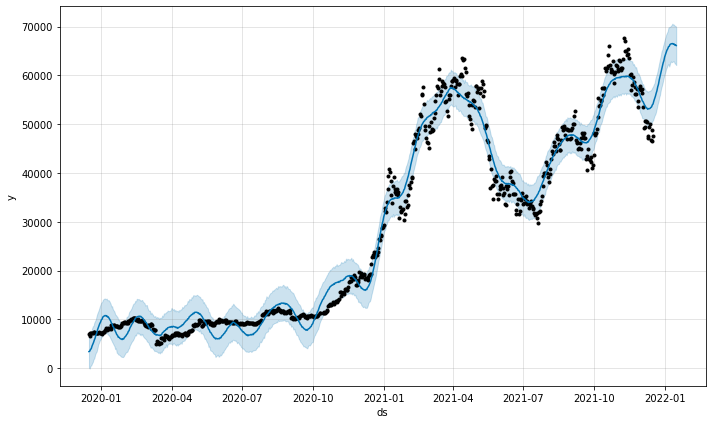

In [51]:
figure=m.plot(forecast, xlabel='ds', ylabel='y')

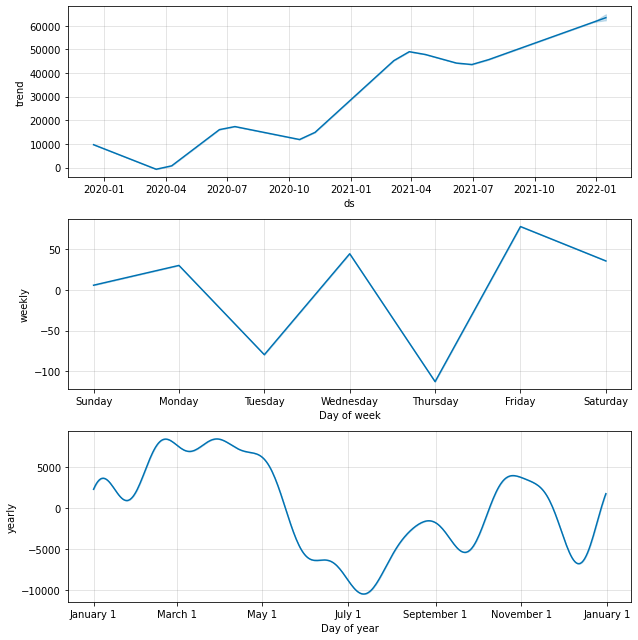

In [52]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [18]:
from google.colab import files
forecast.to_csv(f'{stock}_forecast.csv')
files.download(f'{stock}_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>